In [1]:
import numpy as np 
import segyio
import matplotlib.pyplot as plt
import scipy 

%matplotlib inline

In [2]:
filename = 'Kerry3D.segy' #Get the Data from https://wiki.seg.org/wiki/Kerry-3D

In [4]:
with segyio.open(filename, 'r', iline=73, xline=21) as segyfile:
    data = segyio.tools.cube(segyfile)
    ntraces = segyfile.tracecount
    sr = segyio.tools.dt(segyfile)
    nsamples = segyfile.samples.size
    twt = segyfile.samples + 1000
    size_mb= data.nbytes/1024**2
    inlines = segyfile.ilines
    crosslines = segyfile.xlines
    header = segyio.tools.wrap(segyfile.text[0])

# 2D Section

In [7]:
slice = data[39,:,:]
np.shape(slice)

(735, 1252)

In [8]:
dt = 2

t = np.arange(0, (len(slice[0, :])))*dt
np.shape(t)

(1252,)

In [9]:
x = np.arange(0, (len(slice[:, 0])))*1

In [10]:
arms = []
for i in range(735):
    a = np.square(slice[i])
    mask = np.ones(11)/11
    RMS_amp = np.sqrt(np.convolve(a, mask, 'same'))
    arms.append(RMS_amp)
arms = np.array(arms)
arms = np.reshape(arms, (735, 1252))

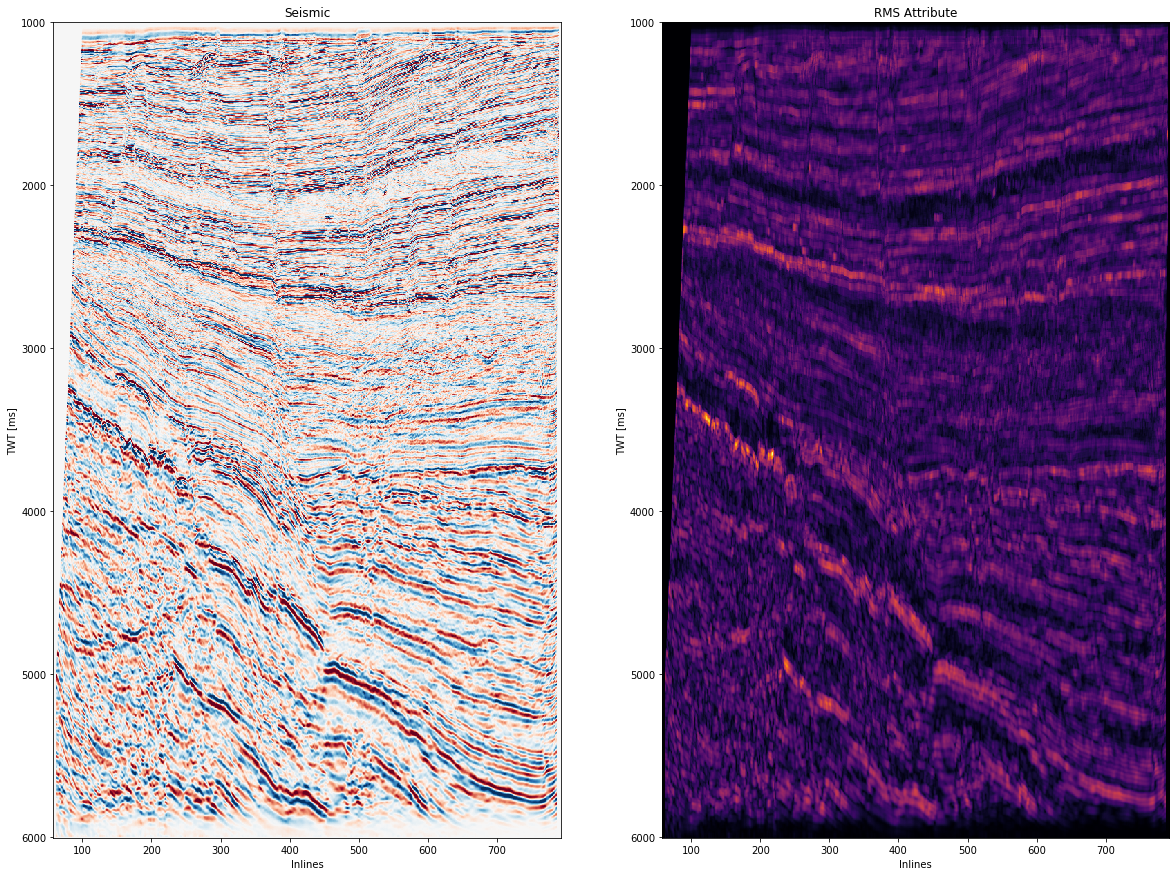

In [11]:
sclip = abs(np.percentile(slice, 0.999))
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot(121)
extent = [crosslines[0], crosslines[-1], twt[-1], twt[0]]
ax1.imshow(slice.T, vmin=-sclip, vmax=sclip, aspect='auto', extent=extent, cmap='RdBu')
ax1.set_xlabel('Inlines')
ax1.set_ylabel('TWT [ms]')
ax1.set_title('Seismic');
aclip = abs(np.percentile(arms, 0.999))
ax2 = plt.subplot(122)
im = ax2.imshow(np.transpose(arms), aspect='auto', extent=extent, cmap='inferno')
# fig.colorbar(im, ax=ax2, aspect='auto')
ax2.set_xlabel('Inlines')
ax2.set_ylabel('TWT [ms]')
ax2.set_title('RMS Attribute');


# 3D Section

In [12]:
data.shape

(287, 735, 1252)

In [13]:
arms = []
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        a = np.square(data[i,j])
        mask = np.ones(11)/11
        RMS_amp = np.sqrt(np.convolve(a, mask, 'same'))
        arms.append(RMS_amp)
ARMS = np.array(arms)
ARMS = np.reshape(ARMS, (287, 735, 1252))

In [14]:
ARMS.shape

(287, 735, 1252)

In [15]:
from mayavi import mlab

source = mlab.pipeline.scalar_field(ARMS)
source.spacing = [1, 1, 1]
for axis in ['x', 'y', 'z']:
    plane = mlab.pipeline.image_plane_widget(source, 
                                    plane_orientation='{}_axes'.format(axis),
                                    slice_index=100, colormap='inferno')
    plane.module_manager.scalar_lut_manager.reverse_lut = False
    
mlab.outline()
mlab.show()

********************************************************************************
         to build the TVTK classes (8.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



DONE